In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from wordcloud import WordCloud

In [3]:
file_path = 'C:\\Users\\danie\\Downloads\\planilla-personal-fijo-enero-diciembre-2023.xlsx'

dataset= pd.read_excel(file_path,sheet_name='PLANILLA PERSONAL ENERO-DI')

dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
1,2,Alexis,Ortega,4-251-335,Director Ejecutivo,3000,NaN,05/10/2023,001,Permanente
2,3,Vanessa,Serrano,8-732-2248,Directora Nacional de Atención al Usuario,3000,NaN,02-09-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente


In [4]:
print(dataset['SXO']=='002')

0       False
1       False
2       False
3       False
4       False
        ...  
5089    False
5090    False
5091    False
5092    False
5093    False
Name: SXO, Length: 5094, dtype: bool


In [5]:
df1m = dataset["SXO"] != 'SXO'

In [6]:
dataset = dataset[df1m]

In [7]:
dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
1,2,Alexis,Ortega,4-251-335,Director Ejecutivo,3000,NaN,05/10/2023,001,Permanente
2,3,Vanessa,Serrano,8-732-2248,Directora Nacional de Atención al Usuario,3000,NaN,02-09-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente


In [9]:
print(dataset.columns)

print(dataset.dtypes)

Index(['Pos.', 'Nombre', 'Apellido', 'Cédula ', 'Cargo', 'Salario Mensual',
       'SXO', 'Inicio de Labores', 'Objeto de Gasto', 'Estatus'],
      dtype='object')
Pos.                 object
Nombre               object
Apellido             object
Cédula               object
Cargo                object
Salario Mensual      object
SXO                  object
Inicio de Labores    object
Objeto de Gasto      object
Estatus              object
dtype: object


In [10]:
print(len(dataset['Nombre'].unique()))

421


Text(0.5, 1.0, 'No. of male and female names in the dataset')

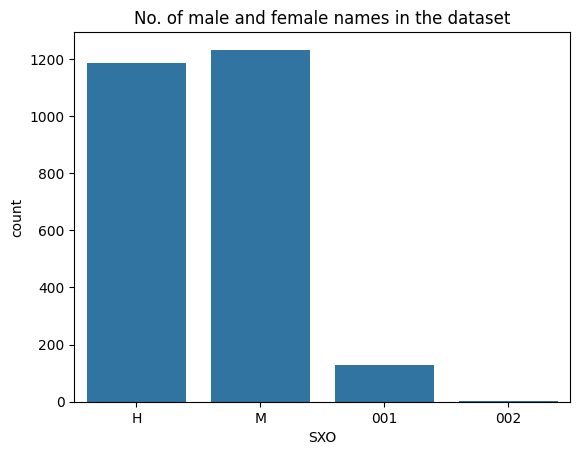

In [11]:
sns.countplot(x='SXO',data = dataset)

plt.title('No. of male and female names in the dataset')

#plt.xticks([0,1,2],('Mujer','Hombre', 'Null'))

In [16]:
dataset = dataset.dropna()

In [18]:
dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente
5,7,Yadira,Viluce,8-239-2249,Analista de Normas Eléctricas,1800,M,16-08-1996,001,Permanente
6,8,Nereyda,Arosemena,8-296-453,Secretaria III,1700,M,04-01-1999,001,Permanente


Text(0.5, 1.0, 'No. of male and female names in the dataset')

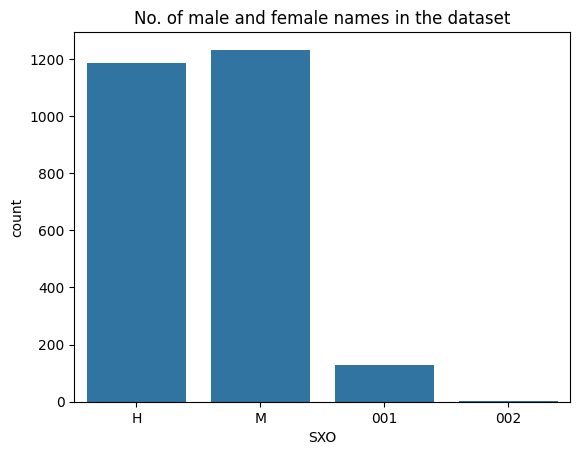

In [19]:
sns.countplot(x='SXO',data = df)

plt.title('No. of male and female names in the dataset')

In [20]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dataset[dataset['Nombre'].str.startswith(i)])

print(startletter_count)

{'A': 298, 'B': 66, 'C': 109, 'D': 163, 'E': 250, 'F': 50, 'G': 110, 'H': 37, 'I': 70, 'J': 218, 'K': 38, 'L': 167, 'M': 308, 'N': 70, 'O': 20, 'P': 10, 'Q': 0, 'R': 225, 'S': 93, 'T': 20, 'U': 20, 'V': 30, 'W': 50, 'X': 20, 'Y': 81, 'Z': 10}


Text(0.5, 1.0, 'Number of names starting with each letter')

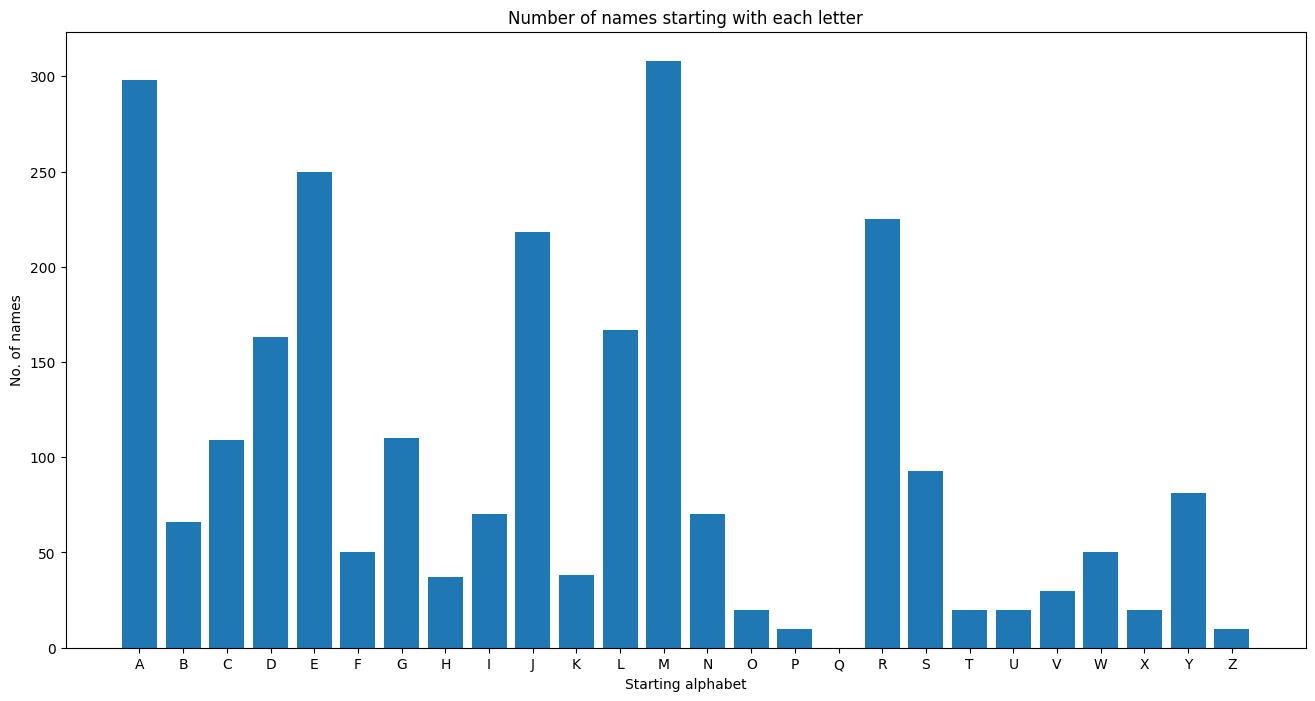

In [21]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [22]:
print('The 5 most name starting letters are : ',

       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('M', 308) ('A', 298) ('E', 250) ('R', 225) ('J', 218)


In [24]:
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:

    endletter_count[i]=len(dataset[dataset['Nombre'].str.endswith(i)])

print(endletter_count)

{'a': 724, 'b': 0, 'c': 0, 'd': 20, 'e': 164, 'f': 0, 'g': 10, 'h': 110, 'i': 30, 'j': 0, 'k': 20, 'l': 249, 'm': 20, 'n': 290, 'o': 338, 'p': 0, 'q': 0, 'r': 66, 's': 295, 't': 10, 'u': 1, 'v': 0, 'x': 0, 'y': 112, 'z': 20}


In [25]:
print('The 5 most name endind letters are : ', *sorted(endletter_count.items(),

        key=lambda item: item[1])[-5:][::-1])

The 5 most name endind letters are :  ('a', 724) ('o', 338) ('s', 295) ('n', 290) ('l', 249)


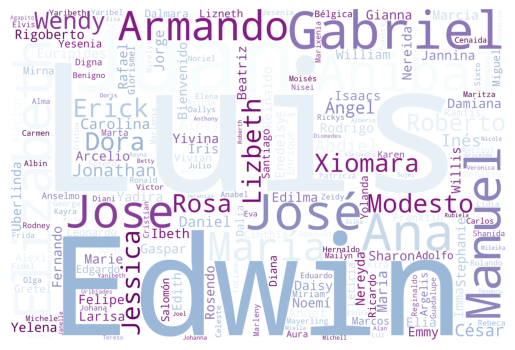

In [28]:
# building a word cloud

text =  " ".join(i for i in dataset.Nombre)

word_cloud = WordCloud(

        width=3000,

        height=2000,

        random_state=1,

        background_color="white",

        colormap="BuPu",

        collocations=False,

        stopwords= None,

        ).generate(text)

plt.imshow(word_cloud)

plt.axis("off")    

plt.show()

In [29]:
X =list( dataset['Nombre'])

Y = list(dataset['SXO'])

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

Y = encoder.fit_transform(Y)

In [31]:
print(Y)

[2 3 3 ... 0 0 0]


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='char')

X=cv.fit_transform(X).toarray()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

In [37]:
# function for confusion matrix

from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

0.7911227154046997
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        32
           1       0.00      0.00      0.00         1
           2       0.77      0.83      0.80       356
           3       0.81      0.82      0.81       377

    accuracy                           0.79       766
   macro avg       0.65      0.43      0.45       766
weighted avg       0.80      0.79      0.78       766

[[  3   0  19  10]
 [  0   0   0   1]
 [  0   0 295  61]
 [  0   0  69 308]]
None


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

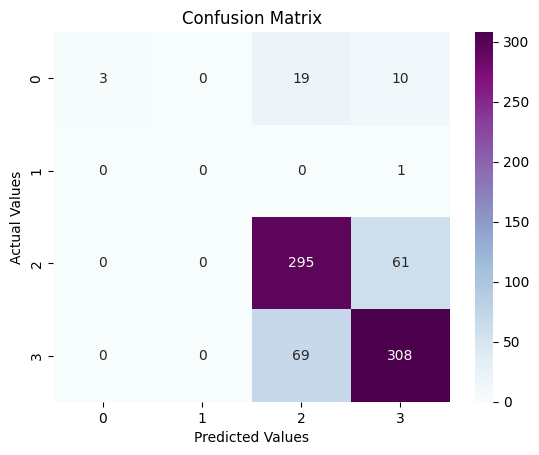

In [38]:
import sklearn.metrics as metrics

#for logistic regression

print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))

0.7180156657963447
              precision    recall  f1-score   support

           0       0.33      0.09      0.15        32
           1       0.00      0.00      0.00         1
           2       0.70      0.75      0.73       356
           3       0.74      0.74      0.74       377

    accuracy                           0.72       766
   macro avg       0.44      0.40      0.40       766
weighted avg       0.71      0.72      0.71       766

[[  3   0  17  12]
 [  0   0   0   1]
 [  5   0 268  83]
 [  1   0  97 279]]
None


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

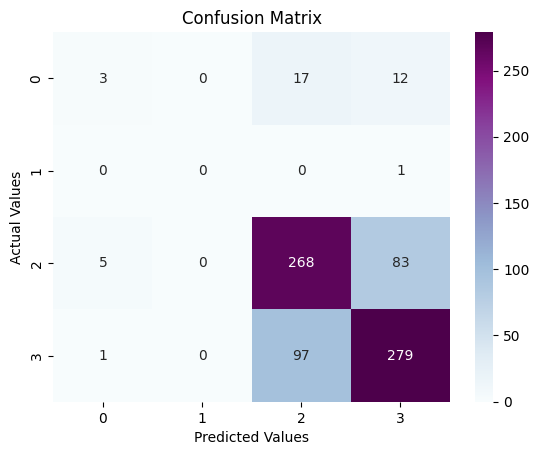

In [39]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))